## Ni の強磁性相転移

DSC のデータは測定装置の都合上符号が逆になっている。

## ライブラリのインポート

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## 関数

In [18]:
def SimpsonIntegral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx/3 * (y[start_index] + 2*np.sum(y[start_index:time_index:2]) + 4*np.sum(y[start_index+1:time_index:2]) + y[time_index])
        res = np.append(res, integrated_value)
    return res

def MidpointIntefral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx * np.sum(y[start_index:time_index])
        res = np.append(res, integrated_value)
    return res

def calcDelta_heating(Time, Delta, Temp, start_index, end_index):

    res1=np.polyfit(Time[end_index:end_index+100], Delta[end_index:end_index+100], 1)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_xlim(Temp[start_index-100],Temp[end_index+100])
    ax1.set_ylim(np.min(Delta[start_index:end_index])*0.95,np.max(Delta[start_index:end_index])*1.05)
    ax1.set_xlabel("Temperature (K)")
    ax1.set_ylabel("Delta")

    ax1.plot(Temp[start_index-100:end_index+100], Delta[start_index-100:end_index+100], c="tab:orange")
    ax1.plot(Temp[start_index-100:end_index+100], res1[0]*Time[start_index-100:end_index+100]+res1[1], c="tab:red")
    ax1.plot(Temp[end_index:end_index+100], res1[0]*Time[end_index:end_index+100]+res1[1], c="tab:green")

    Integral_val = MidpointIntefral(Time, Delta-(res1[0]*Time+res1[1]), start_index, end_index)
    Integral_val -=np.min(Integral_val)

    ax2 = ax1.twinx()
    ax2.set_ylabel("Integral")
    ax2.plot(Temp[start_index:end_index], Integral_val, c = "tab:blue")
    ax1.set_title("Delta = {:.3f}".format(np.max(Integral_val)))
    plt.show()
    return np.max(Integral_val)

def calcDelta_cooling(Time, Delta, Temp, start_index, end_index):

    res1=[(Delta[end_index]-Delta[start_index])/(Time[end_index]-Time[start_index])]
    res1.append(Delta[start_index]-res1[0]*Time[start_index])

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_xlim(Temp[end_index+200],Temp[start_index-200])
    ax1.set_ylim(np.min(Delta[start_index:end_index])*0.95,np.max(Delta[start_index:end_index])*1.05)
    ax1.set_xlabel("Temperature (K)")
    ax1.set_ylabel("Delta")

    ax1.plot(Temp[start_index-200:end_index+200], Delta[start_index-200:end_index+200], c="tab:orange")
    ax1.plot(Temp[start_index-200:end_index+200], res1[0]*Time[start_index-200:end_index+200]+res1[1], c="tab:red")
    ax1.scatter(Temp[start_index], Delta[start_index], c="tab:green")
    ax1.scatter(Temp[end_index], Delta[end_index], c="tab:green")

    Integral_val = MidpointIntefral(Time, Delta-(res1[0]*Time+res1[1]), start_index, end_index)
    Integral_val -=np.min(Integral_val)

    ax2 = ax1.twinx()
    # ax2.set_ylim(np.min(Integral_val),np.max(Integral_val))
    ax2.set_ylabel("Integral")
    ax2.plot(Temp[start_index:end_index], Integral_val, c = "tab:blue")
    ax1.set_title("Delta = {:.3f}".format(np.max(Integral_val)))
    plt.show()
    return np.max(Integral_val)

def SgFilterDerv(x, y):
    dx = x[1]-x[0]
    res = (86*y[0:-9] - 142*y[1:-8] - 193*y[2:-7] - 126*y[3:-6]
          -86*y[8:-1] + 142*y[7:-2] + 193*y[6:-3] + 126*y[5:-4] )/(dx * 1188)
    return res


## 測定データのインポート

In [3]:
df = pd.read_csv("2024_11_08/Ni.csv",
                encoding = 'shift_jis',
                skiprows = 30,
                usecols  = [0, 1, 2])

                                                                     # 単位
Time = df.iloc[:,0].to_numpy() * 60                                  # sec
Temp = df.iloc[:,1].to_numpy() + 273.15                              # K
Dsc  =-df.iloc[:,2].to_numpy() * 10**(-6)                            # W

del df

In [4]:
mass = 7.7 * 10**(-3) # g
Cp   = Dsc[1:] * (Time[1:] - Time[:-1])/(Temp[1:]-Temp[:-1]) / mass  # J/g・K
mol  = mass / 58.6934
dHdt = Dsc / mol
dSdt = dHdt / Temp

C:\Users\xiang\AppData\Local\Temp\ipykernel_20888\2504682062.py:2: RuntimeWarning: divide by zero encountered in divide
  Cp   = Dsc[1:] * (Time[1:] - Time[:-1])/(Temp[1:]-Temp[:-1]) / mass  # J/g・K


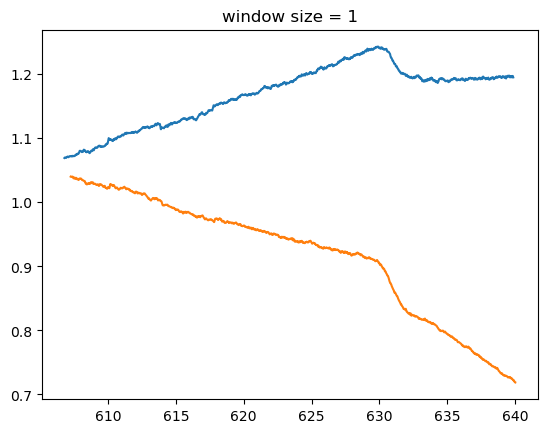

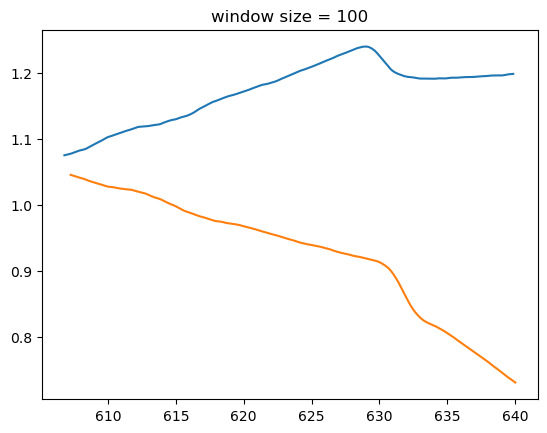

In [5]:
for window_size in [1, 100]:
    Cp1 = Dsc[4:-5]/SgFilterDerv(Time,Temp)/mass
    sma = np.copy(Cp1[0:-window_size])
    for i in range(1, window_size):
        sma += Cp1[i:-window_size+i]
    sma /= window_size
    plt.plot(Temp[1350:3350],sma[1350:3350])
    plt.plot(Temp[5000:7000],sma[5000:7000])
    plt.title(f"window size = {window_size}")
    plt.show()

## プロット

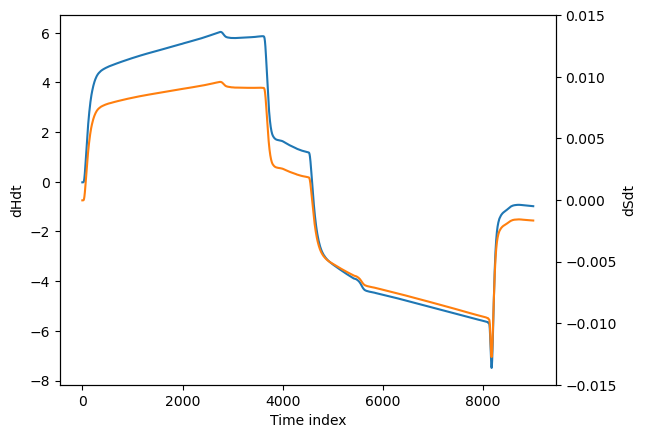

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time index")
ax2 = ax1.twinx()
ax1.set_ylabel("dHdt")
ax2.set_ylabel("dSdt")
ax2.set_ylim(-0.015, 0.015)
ax1.plot(dHdt)
ax2.plot(dSdt, c = "tab:orange")

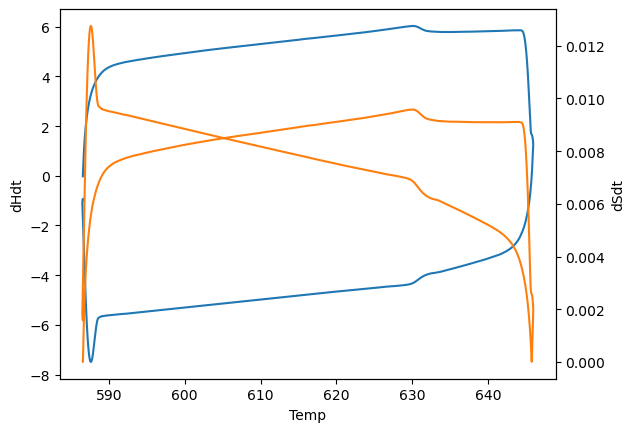

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Temp")
# ax1.set_xlim(620, 640)
# ax1.set_ylim(3,6.5)
ax1.set_ylabel("dHdt")
ax1.plot(Temp, dHdt)

ax2 = ax1.twinx()
ax2.set_ylabel("dSdt")
# ax2.set_ylim(0.004, 0.01)
ax2.plot(Temp, np.abs(dSdt), c = "tab:orange")

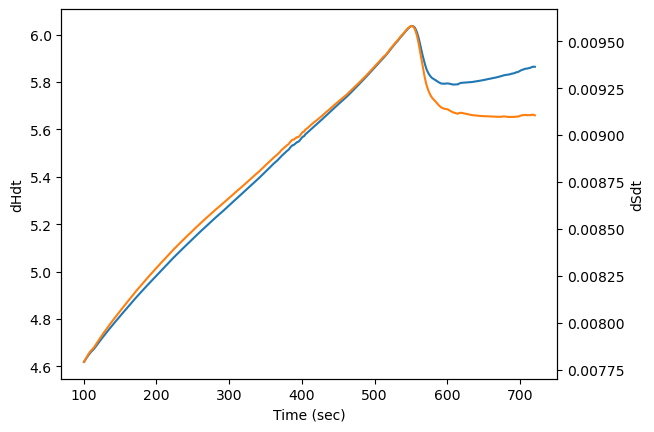

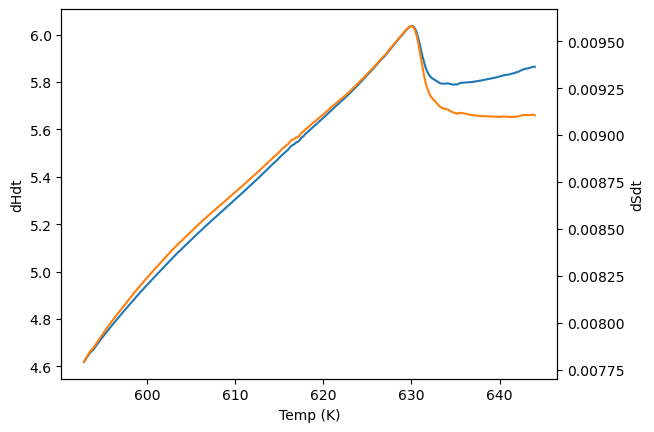

In [8]:
start_index = 500
end_index   = 3600
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time (sec)")
ax2 = ax1.twinx()
ax1.set_ylabel("dHdt")
ax2.set_ylabel("dSdt")
# ax2.set_ylim(-0.015, 0.015)
ax1.plot(Time[start_index:end_index], dHdt[start_index:end_index])
ax2.plot(Time[start_index:end_index], dSdt[start_index:end_index], c = "tab:orange")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Temp (K)")
ax2 = ax1.twinx()
ax1.set_ylabel("dHdt")
ax2.set_ylabel("dSdt")
# ax2.set_ylim(-0.015, 0.015)
ax1.plot(Temp[start_index:end_index], dHdt[start_index:end_index])
ax2.plot(Temp[start_index:end_index], dSdt[start_index:end_index], c = "tab:orange")
plt.show()

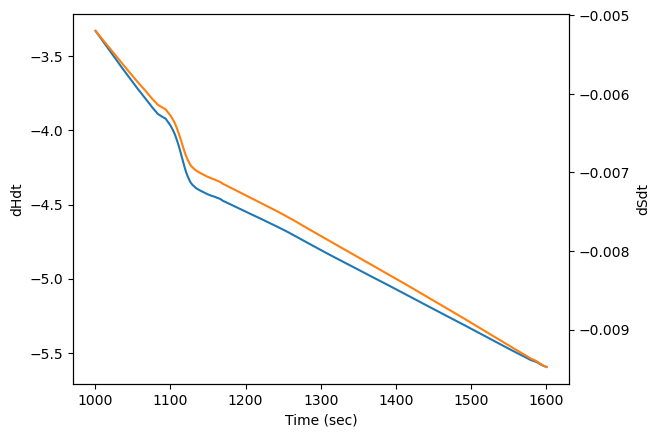

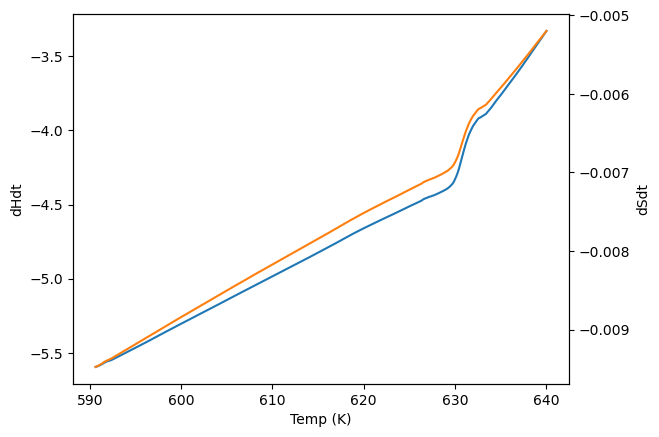

In [9]:
start_index = 5000
end_index   = 8000
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time (sec)")
ax2 = ax1.twinx()
ax1.set_ylabel("dHdt")
ax2.set_ylabel("dSdt")
# ax2.set_ylim(-0.015, 0.015)
ax1.plot(Time[start_index:end_index], dHdt[start_index:end_index])
ax2.plot(Time[start_index:end_index], dSdt[start_index:end_index], c = "tab:orange")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Temp (K)")
ax2 = ax1.twinx()
ax1.set_ylabel("dHdt")
ax2.set_ylabel("dSdt")
# ax2.set_ylim(-0.015, 0.015)
ax1.plot(Temp[start_index:end_index], dHdt[start_index:end_index])
ax2.plot(Temp[start_index:end_index], dSdt[start_index:end_index], c = "tab:orange")
plt.show()

## 転移熱

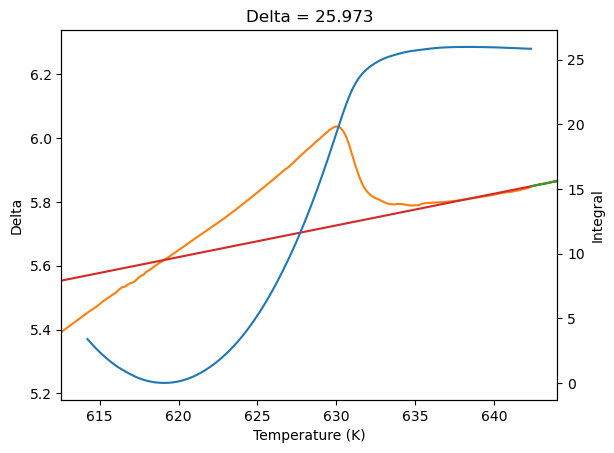

25.972913122024572


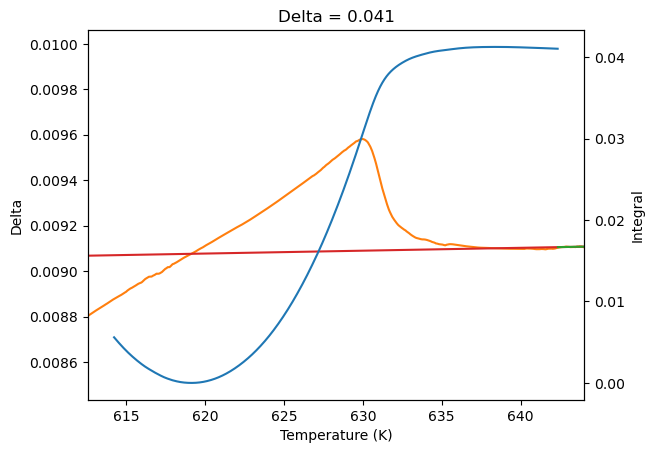

0.041262143810236594


In [17]:
print(calcDelta_heating(Time, dHdt, Temp, 1800, 3500))
print(calcDelta_heating(Time, dSdt, Temp, 1800, 3500))

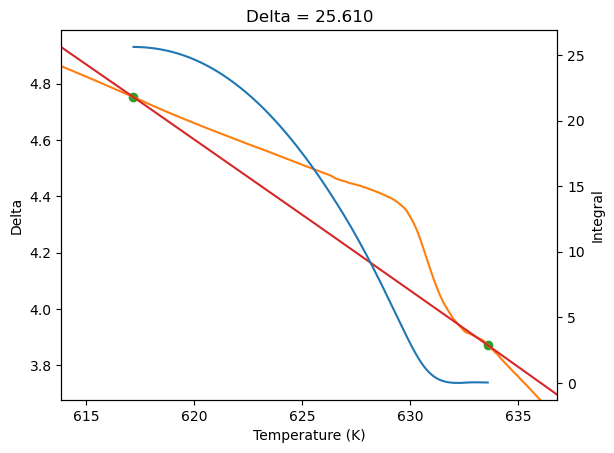

25.610083034684024


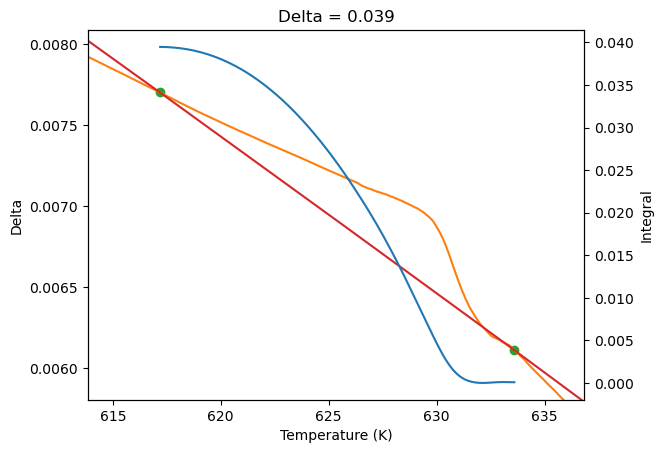

0.039467921528595025


In [19]:
print(calcDelta_cooling(Time, -dHdt, Temp, 5400, 6400))
print(calcDelta_cooling(Time, -dSdt, Temp, 5400, 6400))